***
### **I hope you find this kernel useful and your <font color="red"><b>UPVOTES</b></font> would be highly appreciated**
***
# Logistic Regression Project (Predict Ad click)

In this notebook we will use `Logistic Regression` to indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* '`Daily Time Spent on Site`': consumer time on site in minutes
* '`Age`': cutomer age in years
* '`Area Income`': Avg. Income of geographical area of consumer
* '`Daily Internet Usage`': Avg. minutes a day consumer is on the internet
* '`Ad Topic Line`': Headline of the advertisement
* '`City`': City of consumer
* '`Male`': Whether or not consumer was male
* '`Country`': Country of consumer
* '`Timestamp`': Time at which consumer clicked on Ad or closed window
* '`Clicked on Ad`': 0 or 1 indicated clicking on Ad

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

## Get the Data

In [2]:
data = pd.read_csv("/kaggle/input/advertising/advertising.csv")
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [4]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


# 1. Exploratory Data Analysis

Text(0.5, 0, 'Age')

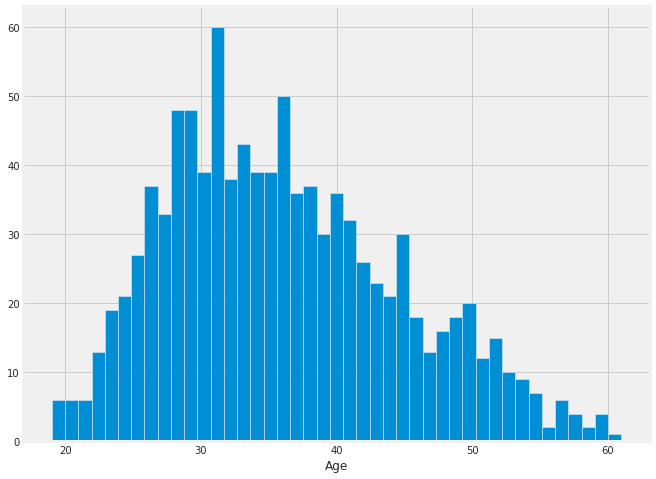

In [5]:
plt.figure(figsize=(10, 8))
data.Age.hist(bins=data.Age.nunique())
plt.xlabel('Age')

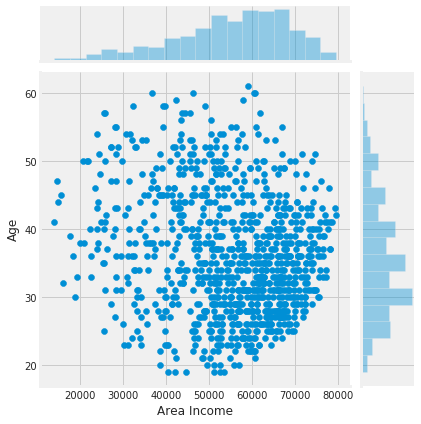

In [6]:
sns.jointplot(data["Area Income"], data.Age)

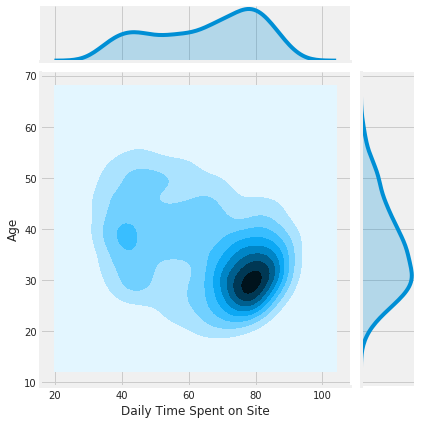

In [7]:
sns.jointplot(data["Daily Time Spent on Site"], data.Age, kind='kde')

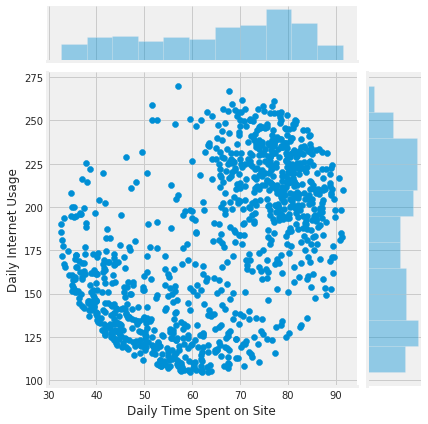

In [8]:
sns.jointplot(data["Daily Time Spent on Site"], data["Daily Internet Usage"])

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


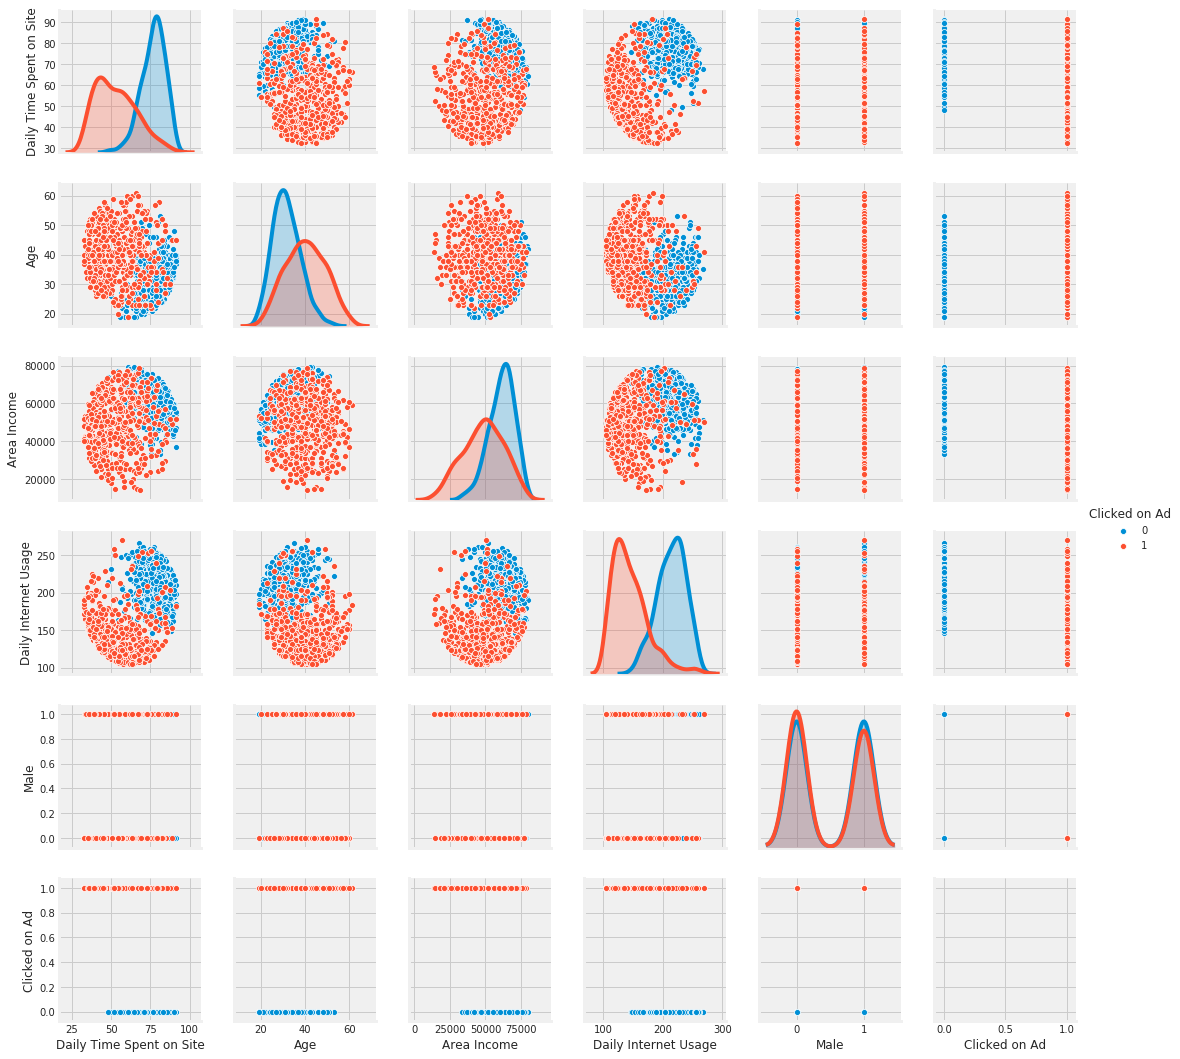

In [9]:
sns.pairplot(data, hue='Clicked on Ad')

# 2. Theory Behind Logistic Regression

Logistic regression is the go-to linear classification algorithm for two-class problems. It is easy to implement, easy to understand and gets great results on a wide variety of problems, even when the expectations the method has for your data are violated.

### Description

#### Logistic Regression

Logistic regression is named for the function used at the core of the method, the [logistic function](https://en.wikipedia.org/wiki/Logistic_function).

The logistic function, also called the **`Sigmoid function`** was developed by statisticians to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

$$\frac{1}{1 + e^{-x}}$$

$e$ is the base of the natural logarithms and $x$ is value that you want to transform via the logistic function.

Text(0.5, 1.0, 'Sigmoid Function')

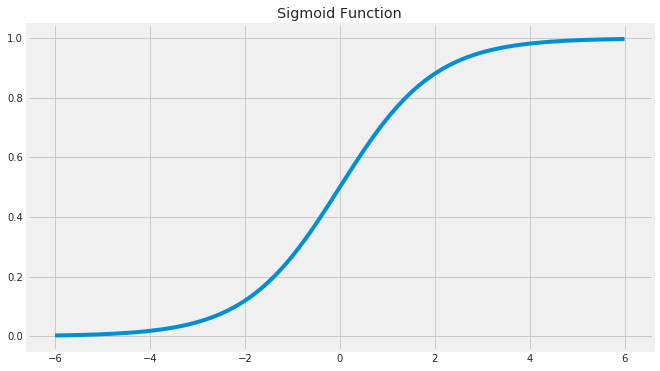

In [10]:
x = np.linspace(-6, 6, num=1000)
plt.figure(figsize=(10, 6))
plt.plot(x, (1 / (1 + np.exp(-x))))
plt.title("Sigmoid Function")

The logistic regression equation has a very similar representation like linear regression. The difference is that the output value being modelled is binary in nature.

$$\hat{y}=\frac{e^{\beta_0+\beta_1x_1}}{1+\beta_0+\beta_1x_1}$$

or

$$\hat{y}=\frac{1.0}{1.0+e^{-\beta_0-\beta_1x_1}}$$

$\beta_0$ is the intecept term

$\beta_1$ is the coefficient for $x_1$

$\hat{y}$ is the predicted output with real value between 0 and 1. To convert this to binary output of 0 or 1, this would either need to be rounded to an integer value or a cutoff point be provided to specify the class segregation point.
***
### Learning the Logistic Regression Model

The coefficients (Beta values b) of the logistic regression algorithm must be estimated from your training data. This is done using [maximum-likelihood estimation](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation).

Maximum-likelihood estimation is a common learning algorithm used by a variety of machine learning algorithms, although it does make assumptions about the distribution of your data (more on this when we talk about preparing your data).

The best coefficients would result in a model that would predict a value very close to 1 (e.g. male) for the default class and a value very close to 0 (e.g. female) for the other class. The intuition for maximum-likelihood for logistic regression is that a search procedure seeks values for the coefficients (Beta values) that minimize the error in the probabilities predicted by the model to those in the data (e.g. probability of 1 if the data is the primary class).

We are not going to go into the math of maximum likelihood. It is enough to say that a minimization algorithm is used to optimize the best values for the coefficients for your training data. This is often implemented in practice using efficient numerical optimization algorithm (like the Quasi-newton method).

When you are learning logistic, you can implement it yourself from scratch using the much simpler gradient descent algorithm.

In [11]:
def evaluate(true, pred):
    from sklearn.metrics import confusion_matrix, accuracy_score
    from sklearn.metrics import precision_score, recall_score, f1_score

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"CONFUSION MATRIX:\n{confusion_matrix(true, pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(true, pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n\tPrecision: {precision:.4f}\n\tRecall: {recall:.4f}\n\tF1_Score: {f1:.4f}")

In [12]:
data["Country"] = data.Country.astype('category').cat.codes
data["City"] = data.City.astype('category').cat.codes

In [13]:
X = data.drop(['Timestamp', 'Clicked on Ad', 'Ad Topic Line'], axis=1)
y = data['Clicked on Ad']

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Prepare Data for Logistic Regression
The assumptions made by logistic regression about the distribution and relationships in your data are much the same as the assumptions made in linear regression.

Much study has gone into defining these assumptions and precise probabilistic and statistical language is used. My advice is to use these as guidelines or rules of thumb and experiment with different data preparation schemes.

Ultimately in predictive modeling machine learning projects you are laser focused on making accurate predictions rather than interpreting the results. As such, you can break some assumptions as long as the model is robust and performs well.

- **Binary Output Variable:** This might be obvious as we have already mentioned it, but logistic regression is intended for binary (two-class) classification problems. It will predict the probability of an instance belonging to the default class, which can be snapped into a 0 or 1 classification.
- **Remove Noise:** Logistic regression assumes no error in the output variable (y), consider removing outliers and possibly misclassified instances from your training data.
- **Gaussian Distribution:** Logistic regression is a linear algorithm (with a non-linear transform on output). It does assume a linear relationship between the input variables with the output. Data transforms of your input variables that better expose this linear relationship can result in a more accurate model. For example, you can use log, root, Box-Cox and other univariate transforms to better expose this relationship.
- **Remove Correlated Inputs:** Like linear regression, the model can overfit if you have multiple highly-correlated inputs. Consider calculating the pairwise correlations between all inputs and removing highly correlated inputs.
- **Fail to Converge:** It is possible for the expected likelihood estimation process that learns the coefficients to fail to converge. This can happen if there are many highly correlated inputs in your data or the data is very sparse (e.g. lots of zeros in your input data).

# 4. Implimenting Logistic Regression in Scikit-Learn

In [15]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver='liblinear', penalty='l1')
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

In [16]:
evaluate(y_test, y_pred)

CONFUSION MATRIX:
[[143   3]
 [  8 146]]
ACCURACY SCORE:
0.9633
CLASSIFICATION REPORT:
	Precision: 0.9799
	Recall: 0.9481
	F1_Score: 0.9637


# 5. Performance Measurement

#### 1. Confusion Matrix
- Each row: actual class
- Each column: predicted class

First row: Non-clicked Ads, the negative class:
* 143 were correctly classified as Non-clicked Ads. **True negatives**. 
* Remaining 8 were wrongly classified as clicked Ads. **False positive**


Second row: The clicked Ads, the positive class:
* 3 were incorrectly classified as Non-clicked Ads. **False negatives**
* 146 were correctly classified clicked Ads. **True positives**

#### 2. Precision

**Precision** measures the accuracy of positive predictions. Also called the `precision` of the classifier ==> `97.98%`

$$\textrm{precision} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Positives}}$$

#### 3. Recall

`Precision` is typically used with `recall` (`Sensitivity` or `True Positive Rate`). The ratio of positive instances that are correctly detected by the classifier.

$$\textrm{recall} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Negatives}}$$ ==> `94.80%`

#### 4. F1 Score

$F_1$ score is the harmonic mean of precision and recall. Regular mean gives equal weight to all values. Harmonic mean gives more weight to low values.


$$F_1=\frac{2}{\frac{1}{\textrm{precision}}+\frac{1}{\textrm{recall}}}=2\times \frac{\textrm{precision}\times \textrm{recall}}{\textrm{precision}+ \textrm{recall}}=\frac{TP}{TP+\frac{FN+FP}{2}}$$ ==> `96.36%`

The $F_1$ score favours classifiers that have similar precision and recall.

#### 5. Precision / Recall Tradeoff

Increasing precision reduced recall and vice versa

In [17]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

In [18]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim(0, 1.5)

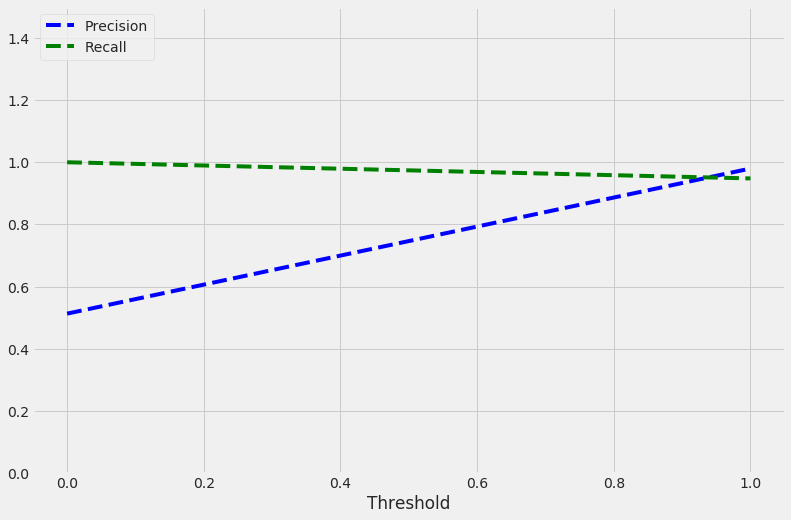

In [19]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12, 8))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

With this chart, you can select the threshold value that gives you the best precision/recall tradeoff for your task.

Some tasks may call for higher precision (accuracy of positive predictions). Like designing a classifier that picks up adult contents to protect kids. This will require the classifier to set a high bar to allow any contents to be consumed by children.

Some tasks may call for higher recall (ratio of positive instances that are correctly detected by the classifier). Such as detecting shoplifters/intruders on surveillance images - Anything that remotely resemble "positive" instances to be picked up.

***

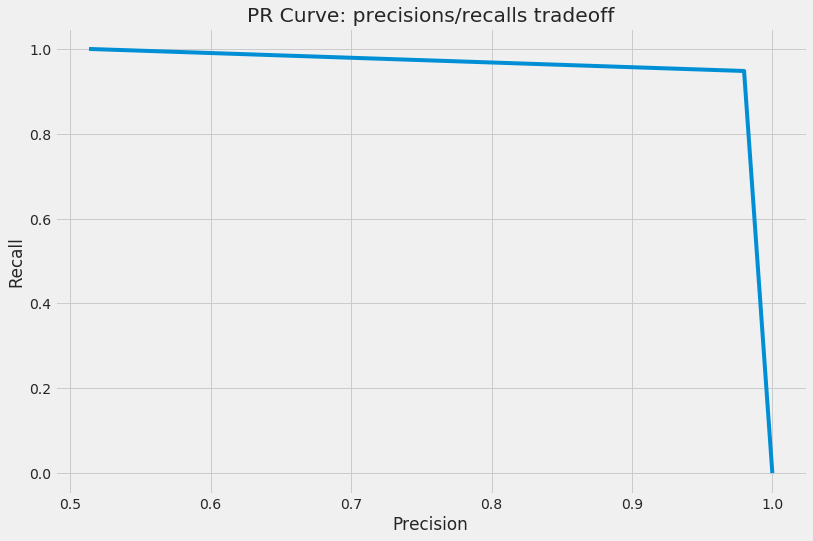

In [20]:
plt.figure(figsize=(12, 8))
plt.plot(precisions, recalls)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.title("PR Curve: precisions/recalls tradeoff");

## The Receiver Operating Characteristics (ROC) Curve

Instead of plotting precision versus recall, the ROC curve plots the `true positive rate` (another name for recall) against the `false positive rate`. The `false positive rate` (FPR) is the ratio of negative instances that are incorrectly classified as positive. It is equal to one minus the `true negative rate`, which is the ratio of negative instances that are correctly classified as negative.

The TNR is also called `specificity`. Hence the ROC curve plots `sensitivity` (recall) versus `1 - specificity`.

In [21]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [22]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], "k--")
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

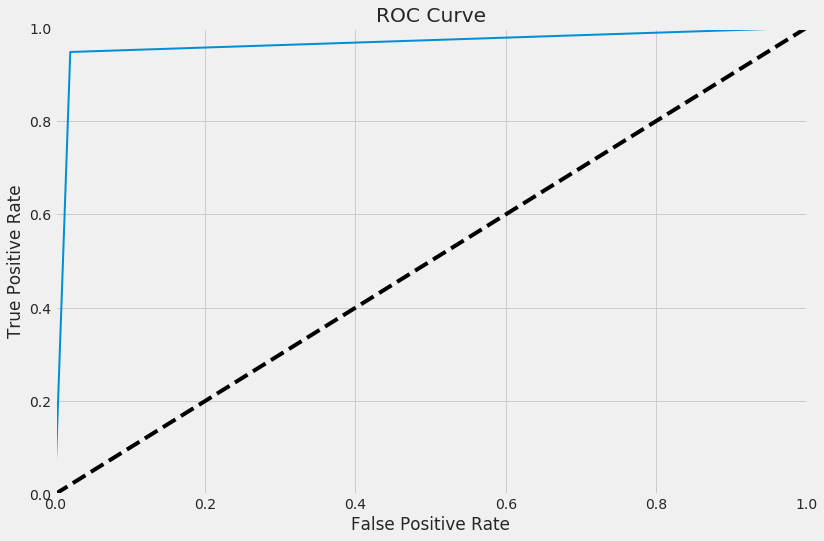

In [23]:
plt.figure(figsize=(12,8)); 
plot_roc_curve(fpr, tpr)
plt.show();

In [24]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.9637520014232343

Use PR curve whenever the **positive class is rare** or when you care more about the false positives than the false negatives

Use ROC curve whenever the **negative class is rare** or when you care more about the false negatives than the false positives


In the example above, the ROC curve seemed to suggest that the classifier is good. However, when you look at the PR curve, you can see that there are room for improvement.

# 6. Logistic Regression Hyperparameter tuning

In [25]:
from sklearn.model_selection import GridSearchCV

penalty = ['l1', 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
class_weight = [{1:0.5, 0:0.5}, {1:0.4, 0:0.6}, {1:0.6, 0:0.4}, {1:0.7, 0:0.3}]
solver = ['liblinear', 'saga']

param_grid = dict(penalty=penalty, C=C, class_weight=class_weight, solver=solver)

grid = GridSearchCV(estimator=log_reg, param_grid=param_grid, scoring='roc_auc',
                    verbose=1, n_jobs=-1, cv=10, iid=True)
grid_result = grid.fit(X_train, y_train)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:   11.3s finished


## Predictions and Evaluations

In [26]:
y_pred = grid_result.predict(X_test)

evaluate(y_test, y_pred)

CONFUSION MATRIX:
[[143   3]
 [  6 148]]
ACCURACY SCORE:
0.9700
CLASSIFICATION REPORT:
	Precision: 0.9801
	Recall: 0.9610
	F1_Score: 0.9705


# 7. Summary
In this Notebook you discovered the logistic regression algorithm for machine learning and predictive modeling. You covered a lot of ground and learned:

- What the logistic function is and how it is used in logistic regression.
- That the key representation in logistic regression are the coefficients, just like linear regression.
- That the coefficients in logistic regression are estimated using a process called maximum-likelihood estimation.
- That making predictions using logistic regression is so easy that you can do it in excel.
- That the data preparation for logistic regression is much like linear regression.
- How to evaluate a machine learning classification problem.
- How to tune logistic regression hyperparameters.

## References:
- [Scikit Learn Library](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)
- [Logistic Regression for Machine Learning by Jason Brownlee PhD](https://machinelearningmastery.com/logistic-regression-for-machine-learning/)